In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

titan = pd.read_csv('/content/train.csv')
titan.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [ ]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titan.shape
titan.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#dropping cabin column 
titan = titan.drop(columns= 'Cabin', axis = 1)

titan.head()


PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0            1         0       3  ...         A/5 21171   7.2500         S
1            2         1       1  ...          PC 17599  71.2833         C
2            3         1       3  ...  STON/O2. 3101282   7.9250         S
3            4         1       1  ...            113803  53.1000         S
4            5         0       3  ...            373450   8.0500         S

[5 rows x 11 columns]

In [ ]:
# getting some statistical measures about the data
titan.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [ ]:
# finding the number of people survived and not survived
titan['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

In [ ]:
# replacing the missing values in "Age" column with mean value
titan['Age'].fillna(titan['Age'].mean(), inplace=True)

In [ ]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


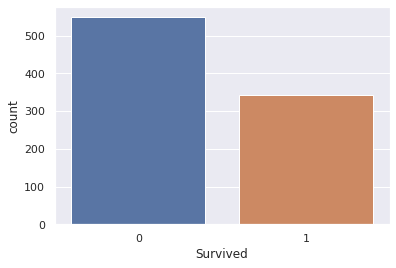

In [ ]:
# making a count plot for "Survived" column
sns.countplot('Survived', data=titan)

In [ ]:
titan['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


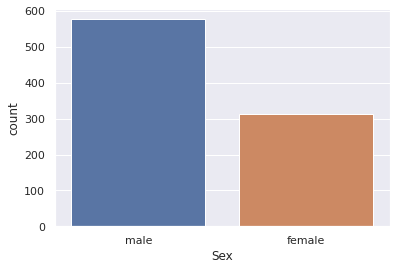

In [ ]:
# making a count plot for "Sex" column
sns.countplot('Sex', data=titan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


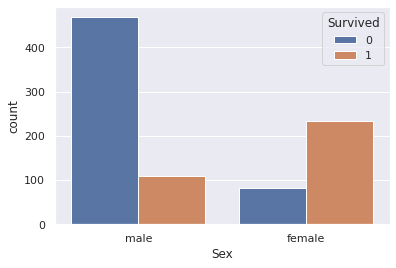

In [ ]:
# number of survivors Gender wise
sns.countplot('Sex', hue='Survived', data=titan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


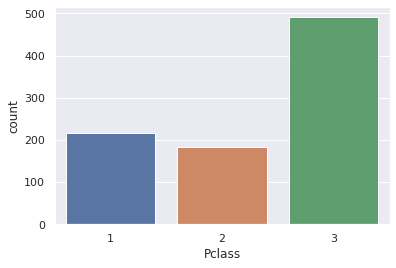

In [ ]:
# making a count plot for "Pclass" column
sns.countplot('Pclass', data=titan)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


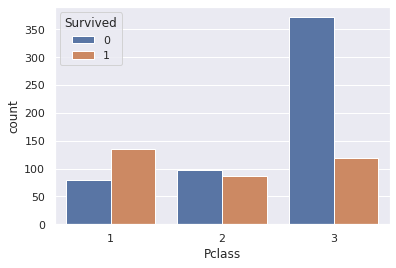

In [ ]:
sns.countplot('Pclass', hue='Survived', data=titan)

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cf95c5c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cf95cfd10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cf95d7d50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cf95d7810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cf95cf290>,
  <matplotlib.lines.Line2D at 0x7f8cf95cf7d0>]}

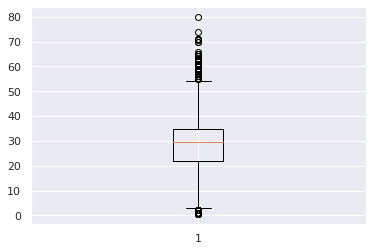

In [ ]:
plt.boxplot(titan['Age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8cf969e510>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8cf9682550>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8cf9707790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8cf9682190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8cf96a1690>,
  <matplotlib.lines.Line2D at 0x7f8cf96a1190>]}

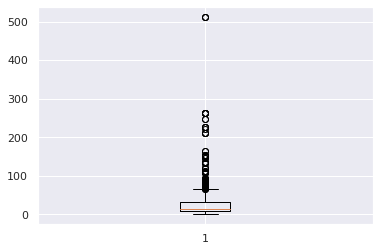

In [ ]:
plt.boxplot(titan['Fare'])

In [ ]:
X_test[:20]

Pclass   male        Age  SibSp      Fare
707       1   True  42.000000      0   26.2875
37        3   True  21.000000      0    8.0500
615       2  False  24.000000      1   65.0000
169       3   True  28.000000      0   56.4958
68        3  False  17.000000      4    7.9250
606       3   True  30.000000      0    7.8958
630       1   True  80.000000      0   30.0000
785       3   True  25.000000      0    7.2500
660       1   True  50.000000      2  133.6500
728       2   True  25.000000      1   26.0000
20        2   True  35.000000      0   26.0000
486       1  False  35.000000      1   90.0000
15        2  False  55.000000      0   16.0000
692       3   True  29.699118      0   56.4958
643       3   True  29.699118      0   56.4958
192       3  False  19.000000      1    7.8542
65        3   True  29.699118      1   15.2458
597       3   True  49.000000      0    0.0000
702       3  False  18.000000      0   14.4542
280       3   True  65.000000      0    7.7500

In [ ]:
X_train_prediction[:20]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
titan['Sex'].value_counts()


male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titan['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titan['Age'] = titan['Age'].fillna(0)
print(titan['Age'])

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [ ]:
titan['male']= titan['Sex']=='male'
X = titan[['Pclass', 'male','Age', 'SibSp', 'Fare']]
y = titan['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(891, 5) (712, 5) (179, 5)


In [ ]:
print(X)

     Pclass   male        Age  SibSp     Fare
0         3   True  22.000000      1   7.2500
1         1  False  38.000000      1  71.2833
2         3  False  26.000000      0   7.9250
3         1  False  35.000000      1  53.1000
4         3   True  35.000000      0   8.0500
..      ...    ...        ...    ...      ...
886       2   True  27.000000      0  13.0000
887       1  False  19.000000      0  30.0000
888       3  False  29.699118      1  23.4500
889       1   True  26.000000      0  30.0000
890       3   True  32.000000      0   7.7500

[891 rows x 5 columns]


In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
X_train_prediction = lr.predict(X_train)
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 

In [ ]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8075842696629213


In [ ]:
X_test_prediction = lr.predict(X_test)
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1]


In [ ]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7653631284916201
